In [24]:
from sklearn.preprocessing import Binarizer
import numpy as np
from main_funcs import get_and_update_data
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [3]:
from binance.enums import HistoricalKlinesType

df = get_and_update_data("BTCUSDT", "4h", HistoricalKlinesType.SPOT, "Germany")
df = df[["open", "high", "low", "close","volume" ]]
df

Start Time: 2023-11-11T12:00:00.100000000
IP from 'Germany' . its OK!
start get data from binance: 2023-11-12 21:45:14.304119
Getting Data ...
finish get data from binance: 2023-11-12 21:45:15.393580
6 radif data gerefte shod az binance
tamam radifha ezafe shod


,open,high,low,close,volume
open_time,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...
2023-11-11 23:30:00,37148.79,37155.00,36666.93,37130.00,4211.552580
2023-11-12 03:30:00,37129.99,37180.00,36731.10,36988.77,3440.454140
2023-11-12 07:30:00,36988.76,37171.10,36913.28,37127.95,2922.378440


In [9]:
df["open_close"] = df.close - df.open
df["open_close_percent"] = df.open_close / df.open
df

,open,high,low,close,volume,open_close,open_close_percent,result
open_time,,,,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865,88.51,0.020770,1.0
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882,93.98,0.021688,1.0
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001,-83.72,-0.018873,-1.0
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716,-27.10,-0.006227,-1.0
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913,-22.48,-0.005219,-1.0
...,...,...,...,...,...,...,...,...
2023-11-11 23:30:00,37148.79,37155.00,36666.93,37130.00,4211.552580,-18.79,-0.000506,-1.0
2023-11-12 03:30:00,37129.99,37180.00,36731.10,36988.77,3440.454140,-141.22,-0.003803,-1.0
2023-11-12 07:30:00,36988.76,37171.10,36913.28,37127.95,2922.378440,139.19,0.003763,1.0


In [10]:
binarizer = Binarizer(threshold=0.0)
data_b = binarizer.fit_transform(df[["open_close"]])
df["result"] = data_b
df = df.replace({'result': 0},-1)

<Axes: >

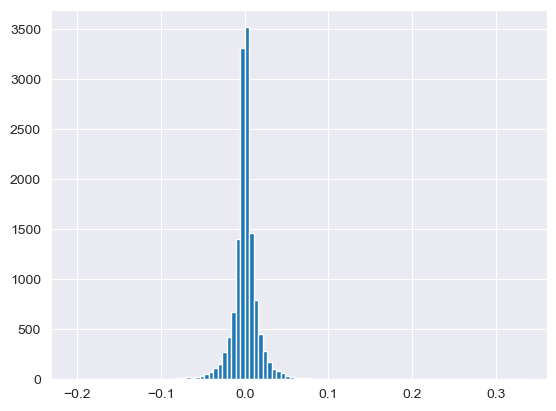

In [14]:
df["log_open_close"]= np.log(df.close)
df["sqrt_open_close"]= np.sqrt(df.close)
# df.open_close.hist(bins=100)
# df.log_open_close.hist(bins=100)
# df.sqrt_open_close.hist(bins=100)
df.open_close_percent.hist(bins=100)

<Axes: >

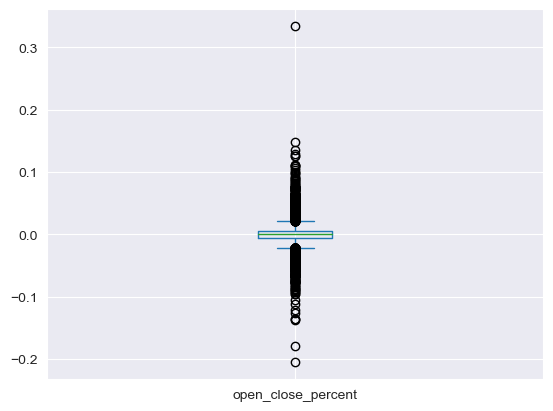

In [15]:
df.open_close_percent.plot(kind='box')

In [58]:
Q1 = df.open_close_percent.quantile(0.25)
Q2 = df.open_close_percent.quantile(0.50)
Q3 = df.open_close_percent.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.0*IQR)
UC = Q3 + (1.0*IQR)
display(LC)
display(UC)

-0.015814440099760366

0.016444453326392546

C:\Users\sajja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


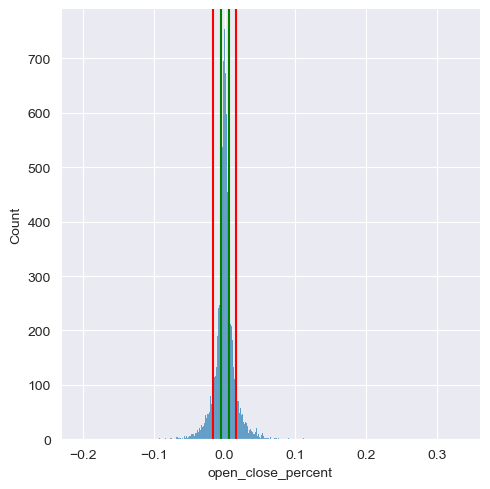

In [59]:
sns.displot(df.open_close_percent)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [60]:
df_clean = df[(df.open_close_percent>LC) & (df.open_close_percent<UC)]

In [61]:
print(df.shape[0])
print(df_clean.shape[0])
print(df_clean.shape[0]/df.shape[0])

13655
11136
0.8155254485536434


<Axes: >

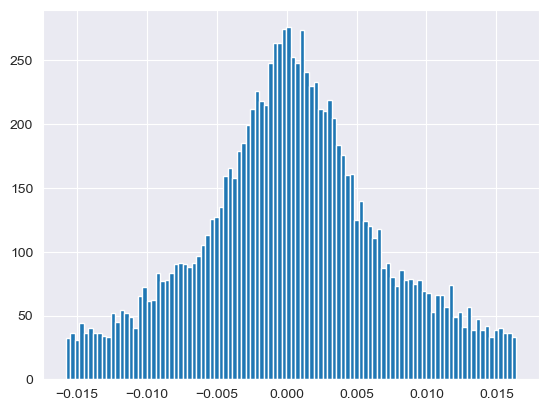

In [62]:
df_clean.open_close_percent.hist(bins=100)

<Axes: >

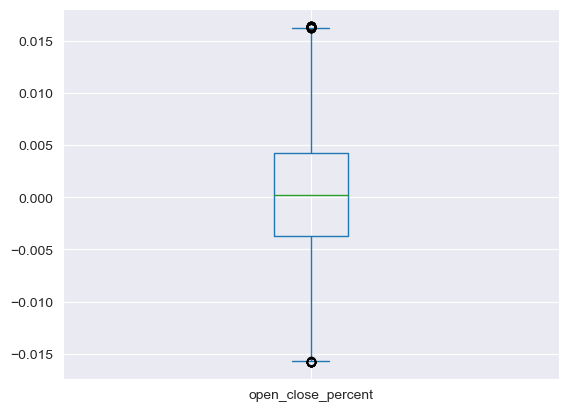

In [63]:
df_clean.open_close_percent.plot(kind='box')

In [85]:
df[(df.open_close_percent.abs()>0.005)]

,open,high,low,close,volume,open_close,open_close_percent,result,log_open_close,sqrt_open_close,zscore_open_close_percent
open_time,,,,,,,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865,88.51,0.020770,1.0,8.377929,65.954454,1.259311
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882,93.98,0.021688,1.0,8.395545,66.537959,1.315786
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001,-83.72,-0.018873,-1.0,8.378469,65.972267,-1.179547
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716,-27.10,-0.006227,-1.0,8.372221,65.766481,-0.401543
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913,-22.48,-0.005219,-1.0,8.362895,65.460522,-0.339541
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-09 19:30:00,37084.03,37211.10,35600.00,36382.20,20436.926830,-701.83,-0.018925,-1.0,10.501835,190.741186,-1.182795
2023-11-09 23:30:00,36382.21,36784.57,36139.57,36701.09,7494.969520,318.88,0.008765,1.0,10.510562,191.575285,0.520742
2023-11-10 07:30:00,36733.27,36807.69,36427.61,36439.98,6598.979340,-293.29,-0.007984,-1.0,10.503422,190.892588,-0.509683
